#### Problem Description:
* A relatively young bank is growing rapidly in terms of overall customer acquisition.Majority of these are Liability customers with varying sizes of relationship with the bank.The customer base of Asset customers is quite small, and the bank WANTS to grow this base rapidly to bring in more loan business. 

* Specifically, it wants to explore ways of converting its liability customers to Personal Loan customers.

* A campaign the bank ran for liability customers last year showed a healthy conversion rate of over 9% successes. This has encouraged the Retail Marketing department to devise smarter campaigns with better target marketing.

#### Anlaytics Objectives :
	
	
* 1	While designing a new campaign, can we model the previous campaign's customer behavior to 
	analyze what combination of parameters make a customer more likely to 
	accept a personal loan?
	
* 2	There are several special products / facilities the bank offers like CD and security accounts, 
	online services, credit cards, etc. Can we spot any association among these
	for finding cross-selling opportunities?

#### Data Set Description :
* ID:	Customer ID			
* Age:	Customer's age in completed years			
* Experience:	#years of professional experience			
* Income:	Annual income of the customer in thousands of Dollars			
* ZIPCode:	Home Address ZIP code.			Do not use ZIP code
* Family:	Family size of the customer			
* CCAvg:	Avg. spending on credit cards per month in thousands of Dollars		
* Education:	Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional			
* Mortgage:	Value of house mortgage if any. (thousands of Dollars)			
* **Personal Loan:	Did this customer accept the personal loan offered in the last campaign?**			
* Securities Account:	Does the customer have a securities account with the bank?			
* CD Account:	Does the customer have a certificate of deposit (CD) account with the bank?			
* Online:	Does the customer use internet banking facilities?			
* CreditCard:	Does the customer use a credit card issued by UniversalBank?			

#### Note:
* While reading the data set  replace the '?',',' as NAs

#### Experiment :
* Building a Random Forest to predict whether a person takes personal loan or not



In [62]:
import os
import pandas as pd
path = os.getcwd()
os.chdir(path)

In [2]:
import warnings
warnings.filterwarnings('ignore')

####  Check the dimensions and type

In [3]:
bank=pd.read_csv("UniversalBank.csv",na_values=["?",","])
print("The number of Rows in the bank data set  ="+str(bank.shape[0]))
print("The number of Columns in the bank data set =" +str(bank.shape[1]))

The number of Rows in the bank data set  =5000
The number of Columns in the bank data set =14


#### Print Columns names and check the datatypes of columns(dtypes)

In [4]:
print("The columns in the data set are : \n",list(bank.columns))

The columns in the data set are : 
 ['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']


In [5]:
print("The data types of the columns are :\n ",bank.dtypes)

The data types of the columns are :
  ID                      int64
Age                   float64
Experience            float64
Income                float64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object


#### Check the top 10 rows to glance the data set 

In [6]:
bank.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25.0,1.0,49.0,91107,4,1.6,1,0,0,1,0,0,0
1,2,45.0,19.0,34.0,90089,3,1.5,1,0,0,1,0,0,0
2,3,39.0,15.0,11.0,94720,1,1.0,1,0,0,0,0,0,0
3,4,35.0,9.0,100.0,94112,1,2.7,2,0,0,0,0,0,0
4,5,35.0,8.0,45.0,91330,4,1.0,2,0,0,0,0,0,1
5,6,37.0,13.0,29.0,92121,4,0.4,2,155,0,0,0,1,0
6,7,53.0,27.0,72.0,91711,2,1.5,2,0,0,0,0,1,0
7,8,50.0,24.0,22.0,93943,1,0.3,3,0,0,0,0,0,1
8,9,35.0,10.0,81.0,90089,3,0.6,2,104,0,0,0,1,0
9,10,NaN,9.0,180.0,93023,1,8.9,3,0,1,0,0,0,0


In [7]:
bank.tail(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4990,4991,55.0,25.0,58.0,95023,4,2.00,3,219,0,0,0,0,1
4991,4992,51.0,25.0,92.0,91330,1,1.90,2,100,0,0,0,0,1
4992,4993,30.0,5.0,13.0,90037,4,0.50,3,0,0,0,0,0,0
4993,4994,45.0,21.0,218.0,91801,2,6.67,1,0,0,0,0,1,0
4994,4995,64.0,40.0,75.0,94588,3,2.00,3,0,0,0,0,1,0
4995,4996,29.0,3.0,40.0,92697,1,1.90,3,0,0,0,0,1,0
4996,4997,30.0,4.0,15.0,92037,4,0.40,1,85,0,0,0,1,0
4997,4998,63.0,39.0,24.0,93023,2,0.30,3,0,0,0,0,0,0
4998,4999,65.0,40.0,49.0,90034,3,0.50,2,0,0,0,0,1,0
4999,5000,28.0,4.0,83.0,92612,3,0.80,1,0,0,0,0,1,1


#### Check the summary of dataframe(describe())

In [8]:
bank.describe(include='all')

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,4998.000000,4998.000000,4987.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.336335,20.108043,73.807098,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.460241,11.468603,46.037325,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


#### Check the unique levels in the target attribute Personal and also check for the percentage distribution

In [11]:
bank["Personal Loan"].value_counts()/bank.shape[0]

0    0.904
1    0.096
Name: Personal Loan, dtype: float64

#### Check the number of unique ZIP Codes present in the dataset 

In [12]:
print("The number of Unique ZIP Codes in the bank data set",bank['ZIP Code'].value_counts().count())


The number of Unique ZIP Codes in the bank data set 467


#### Check the Unique counts of  Family members  present in the dataset

In [13]:
print("The number of Unique Family members in the bank data set: \n",bank['Family'].value_counts())

The number of Unique Family members in the bank data set: 
 1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64


#### Check the Unique counts of Education levels present in the dataset

In [14]:
print("The number of Unique Education levels in the bank data set: \n",bank['Education'].value_counts())

The number of Unique Education levels in the bank data set: 
 1    2096
3    1501
2    1403
Name: Education, dtype: int64


#### Do Necessary changes for the data types from the previous observations

In [15]:
bank['Education']=bank['Education'].astype('category')
bank['CD Account']=bank['CD Account'].astype('category')
bank['Online']=bank['Online'].astype('category')
bank['CreditCard']=bank['CreditCard'].astype('category')
bank['Securities Account']=bank['Securities Account'].astype('category')
bank['Family']=bank['Family'].astype('category')
bank['ZIP Code']=bank['ZIP Code'].astype('category')
bank['Personal Loan']=bank['Personal Loan'].astype('category')
#Use the following code when you have more aolumns
# for column in ['Education', 'CD Account', 'Online']:
#     bank[column]=bank[column].astype('category')
#bank[bank.select_dtypes(['object']).columns] = bank.select_dtypes(['object']).apply(lambda x: x.astype('category'))
#bank[bank.select_dtypes(['object']).columns] = bank.select_dtypes(['object']).apply(lambda x: x.astype('category'))

In [16]:
bank.dtypes

ID                       int64
Age                    float64
Experience             float64
Income                 float64
ZIP Code              category
Family                category
CCAvg                  float64
Education             category
Mortgage                 int64
Personal Loan         category
Securities Account    category
CD Account            category
Online                category
CreditCard            category
dtype: object

#### Remove the unncessary Columns

In [17]:
bank=bank.drop(["ID","ZIP Code"],axis=1)

In [18]:
bank.head(3)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25.0,1.0,49.0,4,1.6,1,0,0,1,0,0,0
1,45.0,19.0,34.0,3,1.5,1,0,0,1,0,0,0
2,39.0,15.0,11.0,1,1.0,1,0,0,0,0,0,0


####  Check the missing values 

In [21]:
bank.isnull().sum()

Age                    2
Experience             2
Income                13
Family                 0
CCAvg                  0
Education              0
Mortgage               0
Personal Loan          0
Securities Account     0
CD Account             0
Online                 0
CreditCard             0
dtype: int64

#### Impute them with mean or median or mode(It is subjective;fillna())

In [22]:
#sample Code for median you can use mean also for numeric and mode for categorical
print(bank['Age'].mean())
print(bank['Experience'].mean())
print(bank['Income'].mean())

45.33633453381353
20.108043217286916
73.80709845598557


In [23]:
bank['Age'].fillna(bank['Age'].median(),inplace=True)
bank['Experience'].fillna(bank['Experience'].median(),inplace=True)
bank['Income'].fillna(bank['Income'].median(),inplace=True)
bank.isnull().sum()

#When you have more columns use the following code
#for column in ['Age', 'Experience', 'Income']:
#    bank[column].fillna(bank[column].mean(), inplace=True)
#If you want to replace with median use median() instead of mean()
#If you want to replace with mode use mode()[0]

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [24]:
bank.describe(include='all')

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.00000,5000.000000,5000.000000,5000.0,5000.000000,5000.0,5000.000000,5000.0,5000.0,5000.0,5000.0,5000.0
unique,NaN,NaN,NaN,4.0,NaN,3.0,NaN,2.0,2.0,2.0,2.0,2.0
top,NaN,NaN,NaN,1.0,NaN,1.0,NaN,0.0,0.0,0.0,1.0,0.0
freq,NaN,NaN,NaN,1472.0,NaN,2096.0,NaN,4520.0,4478.0,4698.0,2984.0,3530.0
mean,45.33620,20.108000,73.781600,NaN,1.937938,NaN,56.498800,NaN,NaN,NaN,NaN,NaN
std,11.45795,11.466309,45.980138,NaN,1.747659,NaN,101.713802,NaN,NaN,NaN,NaN,NaN
min,23.00000,-3.000000,8.000000,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,35.00000,10.000000,39.000000,NaN,0.700000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
50%,45.00000,20.000000,64.000000,NaN,1.500000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
75%,55.00000,30.000000,98.000000,NaN,2.500000,NaN,101.000000,NaN,NaN,NaN,NaN,NaN


#### SPLIT THE data in to train and test(use sklearn package)

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
y=bank["Personal Loan"]
X=bank.drop('Personal Loan', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)  

In [27]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4000, 11)
(1000, 11)
(4000,)
(1000,)


#### Split the numerical and Categorical Attributes

In [28]:
num_attr = X.select_dtypes(include=['float64','int64']).columns
num_attr

Index(['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage'], dtype='object')

In [29]:
cat_attr = X.select_dtypes(exclude=['float64','int64']).columns
cat_attr

Index(['Family', 'Education', 'Securities Account', 'CD Account', 'Online',
       'CreditCard'],
      dtype='object')

#### Standardize the data (numerical attributes only)( import StandardScaler) 


In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
num_atr=X_train.select_dtypes(['int64','float64']).columns
num_atr

Index(['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage'], dtype='object')

In [32]:
cat_atr = X_train.select_dtypes('category').columns
cat_atr

Index(['Family', 'Education', 'Securities Account', 'CD Account', 'Online',
       'CreditCard'],
      dtype='object')

In [33]:
scaler = StandardScaler()
scaler.fit(X_train[num_atr])


StandardScaler(copy=True, with_mean=True, with_std=True)

In [34]:
scaler.mean_

array([45.44     , 20.211    , 74.4615   ,  1.9536125, 56.96525  ])

In [35]:
scaler.var_

array([1.32192900e+02, 1.32205479e+02, 2.14199552e+03, 3.13090077e+00,
       1.05569950e+04])

In [36]:
X_train[num_atr]=scaler.transform(X_train[num_atr])
X_test[num_atr]=scaler.transform(X_test[num_atr])

In [37]:
print(X_train.shape)
print(X_test.shape)

(4000, 11)
(1000, 11)


In [38]:
X_train = pd.get_dummies(columns=cat_atr,data=X_train,drop_first=True)

In [39]:
X_test = pd.get_dummies(columns=cat_atr,data=X_test,drop_first=True)

In [40]:
X_train.head()

,Age,Experience,Income,CCAvg,Mortgage,Family_2,Family_3,Family_4,Education_2,Education_3,Securities Account_1,CD Account_1,Online_1,CreditCard_1
2465,1.092410,1.199245,-1.068705,-0.934543,0.642691,1,0,0,0,0,0,0,1,0
4944,0.309632,0.329534,-0.895851,-0.143330,-0.554421,0,1,0,1,0,0,0,1,0
3465,1.701237,1.808043,-0.701390,-0.030299,-0.554421,0,0,0,1,0,0,0,0,0
404,1.353336,1.373188,-0.312467,-0.821512,1.216916,0,1,0,1,0,0,0,0,0
4412,-0.994997,-0.888063,-1.198346,-0.878027,-0.554421,0,0,1,1,0,0,0,0,0


In [41]:
X_test.head()

,Age,Experience,Income,CCAvg,Mortgage,Family_2,Family_3,Family_4,Education_2,Education_3,Securities Account_1,CD Account_1,Online_1,CreditCard_1
4655,-1.081973,-1.148976,2.453205,2.851977,5.100232,1,0,0,1,0,0,0,0,0
3998,-0.994997,-0.888063,-0.722996,-0.352436,-0.554421,0,0,0,0,0,0,0,0,1
3926,0.222657,0.242563,-0.679783,-0.369390,-0.554421,1,0,0,0,0,0,0,1,0
494,-0.386170,-0.279264,1.848214,3.417129,-0.554421,1,0,0,0,0,0,0,1,0
2983,0.918459,1.025303,0.335737,-0.934543,-0.554421,1,0,0,0,0,0,0,1,1


# Now It is time for Model BUilding 

#### Let us see the details of the Random Forest in Sklearn 
* class sklearn.ensemble.RandomForestClassifier(n_estimators=’warn’, criterion=’gini’, max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None)



* A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement if bootstrap=True 

Parameters
* **n_estimators** : integer, optional (default=10)
    The number of trees in the forest.The default value of n_estimators will change from 10 in version 0.20 to 100 in version 0.22.

* **criterion** : string, optional (default=”gini”)
    The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. Note: this parameter is tree-specific.

* **max_depth** : integer or None, optional (default=None)
    The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

* **min_samples_split** : int, float, optional (default=2)
    The minimum number of samples required to split an internal node:

    If int, then consider min_samples_split as the minimum number.
    If float, then min_samples_split is a fraction and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.


* **min_samples_leaf** : int, float, optional (default=1)
    The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

    If int, then consider min_samples_leaf as the minimum number.
    If float, then min_samples_leaf is a fraction and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.


* **min_weight_fraction_leaf** : float, optional (default=0.)
    The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.

* **max_features** : int, float, string or None, optional (default=”auto”)
    The number of features to consider when looking for the best split:

    If int, then consider max_features features at each split.
    If float, then max_features is a fraction and int(max_features * n_features) features are considered at each split.
    If “auto”, then max_features=sqrt(n_features).
    If “sqrt”, then max_features=sqrt(n_features) (same as “auto”).
    If “log2”, then max_features=log2(n_features).
    If None, then max_features=n_features.
    Note: the search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than max_features features.

* **max_leaf_nodes** : int or None, optional (default=None)
    Grow trees with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.

* **min_impurity_decrease** : float, optional (default=0.)
    A node will be split if this split induces a decrease of the impurity greater than or equal to this value.

  The weighted impurity decrease equation is the following:

    N_t / N * (impurity - N_t_R / N_t * right_impurity
                    - N_t_L / N_t * left_impurity)
    where N is the total number of samples, N_t is the number of samples at the current node, N_t_L is the number of samples in the left child, and N_t_R is the number of samples in the right child.

    N, N_t, N_t_R and N_t_L all refer to the weighted sum, if sample_weight is passed.

* **bootstrap** : boolean, optional (default=True)
    Whether bootstrap samples are used when building trees.

* **oob_score** : bool (default=False)
    Whether to use out-of-bag samples to estimate the generalization accuracy.

* **n_jobs** : int or None, optional (default=None)
    The number of jobs to run in parallel for both fit and predict. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors. See Glossary for more details.

* **random_state** : int, RandomState instance or None, optional (default=None)
    If int, random_state is the seed used by the random number generator; If RandomState instance, random_state is the random number generator; If None, the random number generator is the RandomState instance used by np.random.

* **verbose** : int, optional (default=0)
    Controls the verbosity when fitting and predicting.

* **warm_start** : bool, optional (default=False)
    When set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble, otherwise, just fit a whole new forest. See the Glossary.

* **class_weight** : dict, list of dicts, “balanced”, “balanced_subsample” or None, optional (default=None)
    Weights associated with classes in the form {class_label: weight}. If not given, all classes are supposed to have weight one. For multi-output problems, a list of dicts can be provided in the same order as the columns of y.

    Note that for multioutput (including multilabel) weights should be defined for each class of every column in its own dict. For example, for four-class multilabel classification weights should be [{0: 1, 1: 1}, {0: 1, 1: 5}, {0: 1, 1: 1}, {0: 1, 1: 1}] instead of [{1:1}, {2:5}, {3:1}, {4:1}].

    The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y))

    The “balanced_subsample” mode is the same as “balanced” except that weights are computed based on the bootstrap sample for every tree grown.

    For multi-output, the weights of each column of y will be multiplied.

    Note that these weights will be multiplied with sample_weight (passed through the fit method) if sample_weight is specified.

####  Build Random Forest Classifier

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
clf = RandomForestClassifier(n_estimators=10,max_depth=8)
clf.fit(X=X_train, y=y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [50]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

y_pred = clf.predict(X_test)
print(accuracy_score(y_test,y_pred))
y_pred = clf.predict(X_train)
print(accuracy_score(y_train,y_pred))
print(recall_score(y_train,y_pred,pos_label=1))

0.977
0.98875
0.8852040816326531


In [51]:
clf.feature_importances_

array([0.02628966, 0.02306095, 0.36874998, 0.15210649, 0.0285553 ,
       0.01477917, 0.06583768, 0.02718458, 0.12333816, 0.09839272,
       0.00483502, 0.05380907, 0.00511646, 0.00794478])

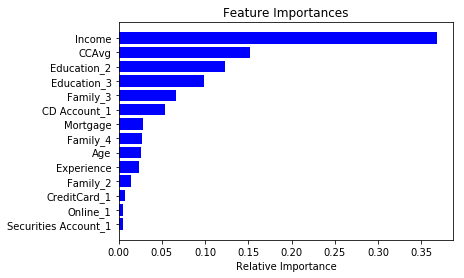

In [53]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
features = X_train.columns
importances = clf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### GridSearch Cross validation

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
rfc = RandomForestClassifier(n_jobs=-1, max_features='sqrt') 
 
# Use a grid over parameters of interest
param_grid = { 
           "n_estimators" : [9, 18, 27, 36, 45, 54, 63],
           "max_depth" : [2,3,5,7],
           "min_samples_leaf" : [2, 4]}
scores = ['precision', 'recall']

In [180]:
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(estimator=rfc, param_grid=param_grid,cv=5,
                       scoring='%s_macro' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'max_depth': 7, 'min_samples_leaf': 2, 'n_estimators': 45}

Grid scores on development set:

0.854 (+/-0.402) for {'max_depth': 2, 'min_samples_leaf': 2, 'n_estimators': 9}
0.854 (+/-0.402) for {'max_depth': 2, 'min_samples_leaf': 2, 'n_estimators': 18}
0.753 (+/-0.491) for {'max_depth': 2, 'min_samples_leaf': 2, 'n_estimators': 27}
0.953 (+/-0.003) for {'max_depth': 2, 'min_samples_leaf': 2, 'n_estimators': 36}
0.853 (+/-0.401) for {'max_depth': 2, 'min_samples_leaf': 2, 'n_estimators': 45}
0.954 (+/-0.003) for {'max_depth': 2, 'min_samples_leaf': 2, 'n_estimators': 54}
0.854 (+/-0.402) for {'max_depth': 2, 'min_samples_leaf': 2, 'n_estimators': 63}
0.945 (+/-0.038) for {'max_depth': 2, 'min_samples_leaf': 4, 'n_estimators': 9}
0.955 (+/-0.005) for {'max_depth': 2, 'min_samples_leaf': 4, 'n_estimators': 18}
0.955 (+/-0.004) for {'max_depth': 2, 'min_samples_leaf': 4, 'n_estimators': 27}
0.853 (+/-

In [56]:
param_grid

{'n_estimators': [9, 18, 27, 36, 45, 54, 63],
 'max_depth': [2, 3, 5, 7],
 'min_samples_leaf': [2, 4]}

In [57]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid,cv=5,verbose=1)
CV_rfc.fit(X=X_train, y=y_train)
print (CV_rfc.best_score_, CV_rfc.best_params_) 

Fitting 5 folds for each of 56 candidates, totalling 280 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.98075 {'max_depth': 7, 'min_samples_leaf': 2, 'n_estimators': 63}


[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:  1.4min finished


In [58]:
CV_rfc.cv_results_

{'mean_fit_time': array([0.4620492 , 0.04209533, 0.05066853, 0.06332636, 0.07161574,
        0.08327355, 0.09463081, 0.02488298, 0.03863225, 0.05100069,
        0.06201067, 0.07404056, 0.08807359, 0.09562259, 0.02520552,
        0.04102225, 0.05397582, 0.06386294, 0.07636337, 0.08675418,
        0.1145606 , 0.02755461, 0.05111985, 0.05416336, 0.06450839,
        0.07559776, 0.08852053, 0.10013752, 0.02622342, 0.04134879,
        0.05519233, 0.07318306, 0.09139175, 0.11827998, 0.12455978,
        0.02778926, 0.04341021, 0.05734186, 0.07725954, 0.08341622,
        0.09581952, 0.11239762, 0.02337246, 0.04081111, 0.05612259,
        0.07326884, 0.08574543, 0.09756556, 0.1188282 , 0.02536545,
        0.03887253, 0.05307579, 0.07061896, 0.09024782, 0.10119925,
        0.11594315]),
 'std_fit_time': array([8.73831328e-01, 1.41195252e-03, 2.16555979e-03, 1.85885849e-03,
        6.91707999e-04, 1.66118680e-03, 2.89669562e-03, 1.07376880e-03,
        1.08331693e-03, 1.46939374e-03, 1.26962718e-0

In [59]:
y_pred_test=CV_rfc.predict(X_test)
print(accuracy_score(y_test,y_pred_test))

0.977


In [60]:
from sklearn.metrics import recall_score
print(recall_score(y_test,y_pred_test, pos_label=1, average='binary'))

0.7613636363636364


#### Bagging

In [63]:
from sklearn.ensemble import BaggingClassifier

In [64]:
clf = BaggingClassifier(n_estimators=10)
clf.fit(X=X_train, y=y_train)

BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=None, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

#### Accuracy on testdata

In [65]:
y_pred = clf.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.983


#### Accuracy on train data

In [66]:
y_pred = clf.predict(X_train)
print(accuracy_score(y_train,y_pred))

0.9985


In [67]:
import sklearn
print(sklearn.__version__)

0.20.2


In [68]:
from sklearn.tree import DecisionTreeClassifier 
param_grid = {
    'base_estimator__max_depth' : [1, 2, 3, 4, 5],
    'max_samples' : [0.05, 0.1, 0.2, 0.5]
}

clf = GridSearchCV(BaggingClassifier(DecisionTreeClassifier(),
                                     n_estimators = 100, max_features = 0.5),
                   param_grid,scoring='recall')
clf.fit(X_train, y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            ...timators=100, n_jobs=None, oob_score=False,
         random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'base_estimator__max_depth': [1, 2, 3, 4, 5], 'max_samples': [0.05, 0.1, 0.2, 0.5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

In [69]:
print(clf.best_score_,clf.best_params_)

0.46932448620082207 {'base_estimator__max_depth': 5, 'max_samples': 0.5}


In [70]:

from sklearn.metrics import recall_score
trainpreds=clf.predict(X_train)
print(recall_score(y_train,trainpreds,pos_label=1))# recall
print(accuracy_score(y_train,trainpreds))# accuracy

0.5586734693877551
0.95675
